In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


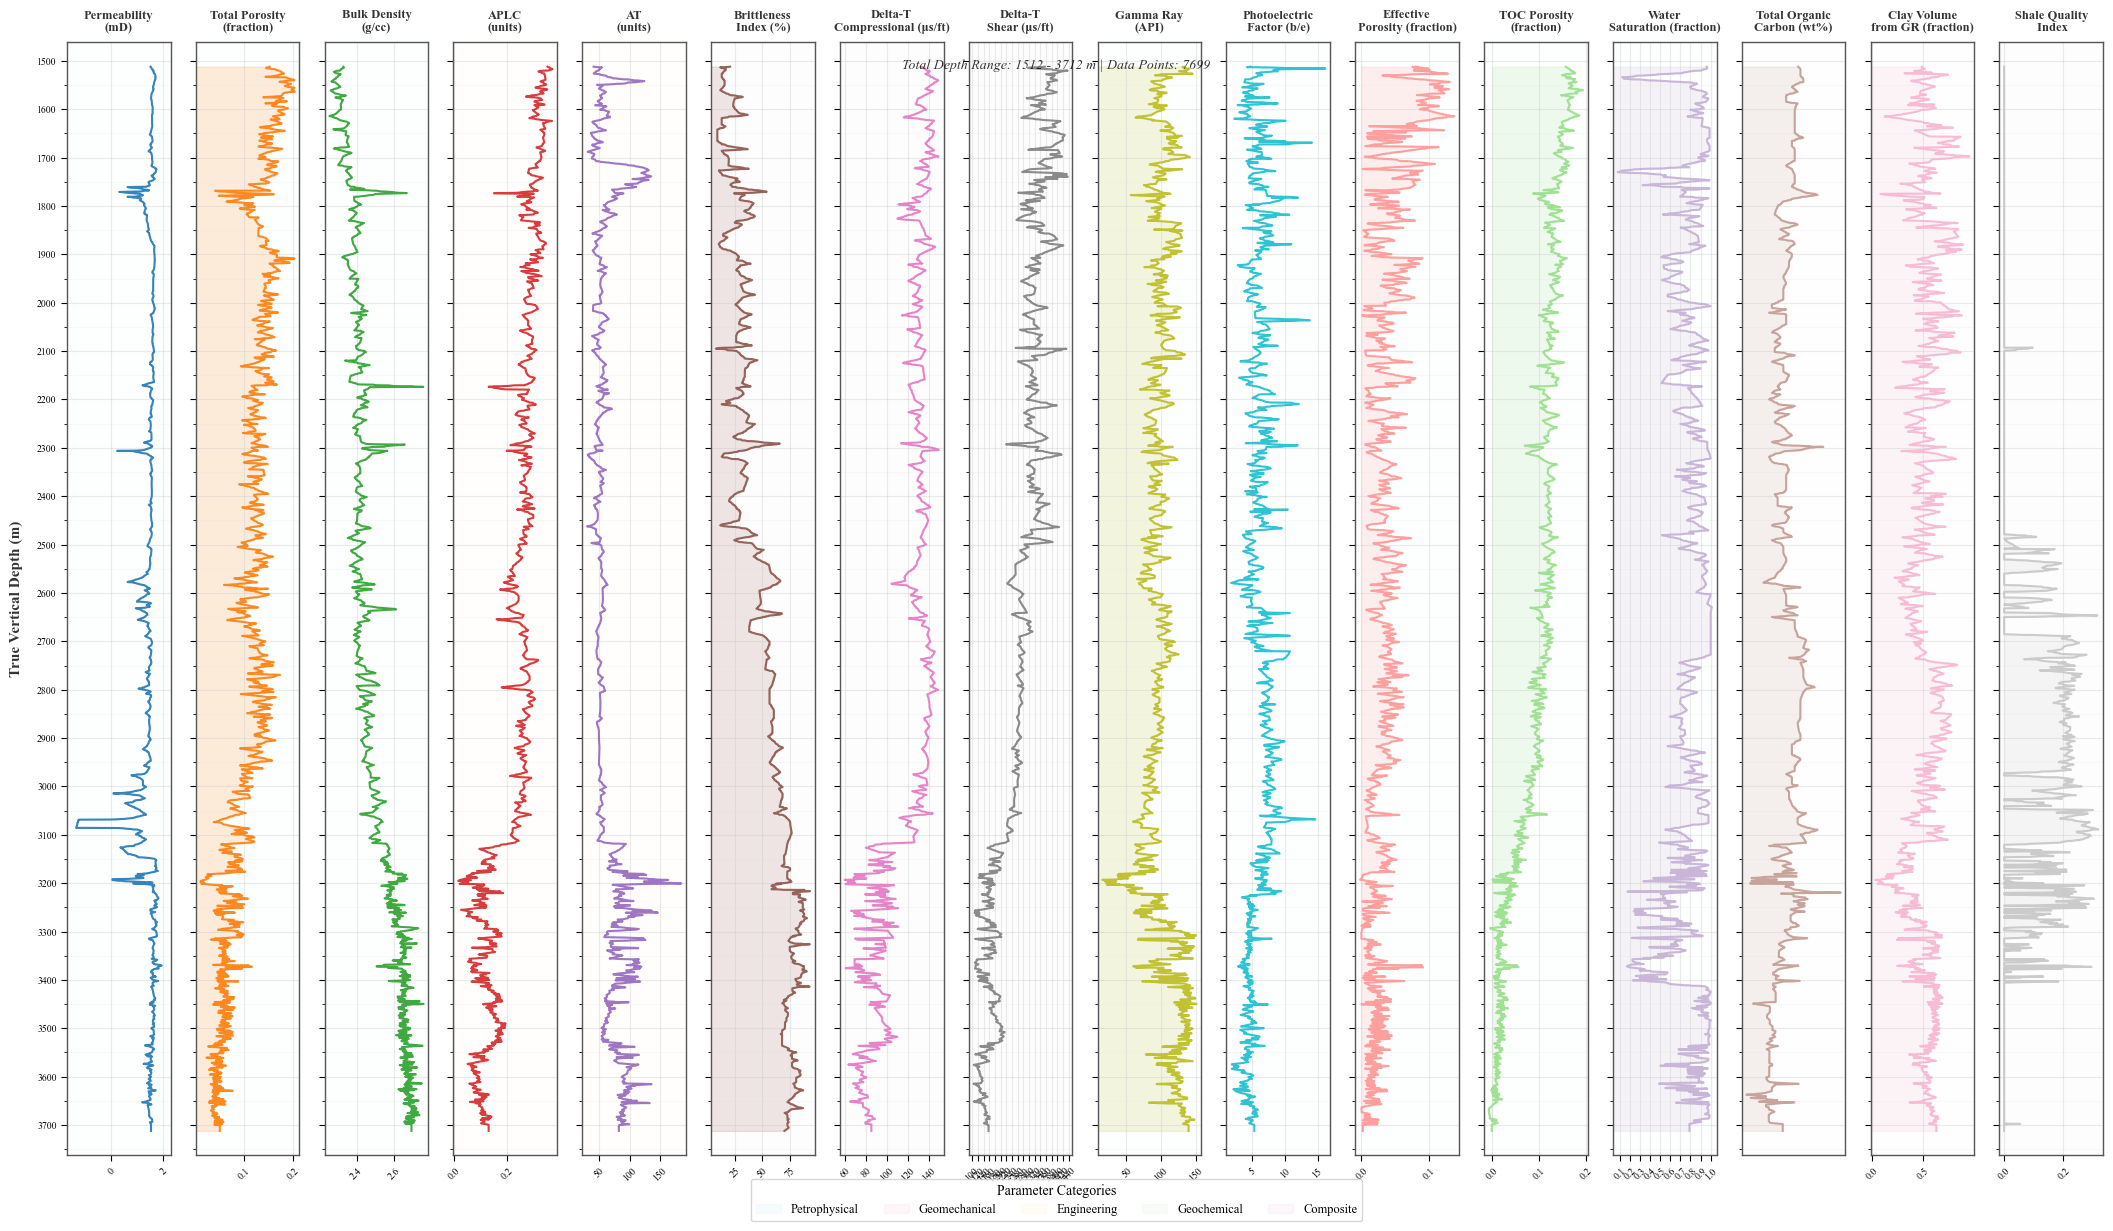

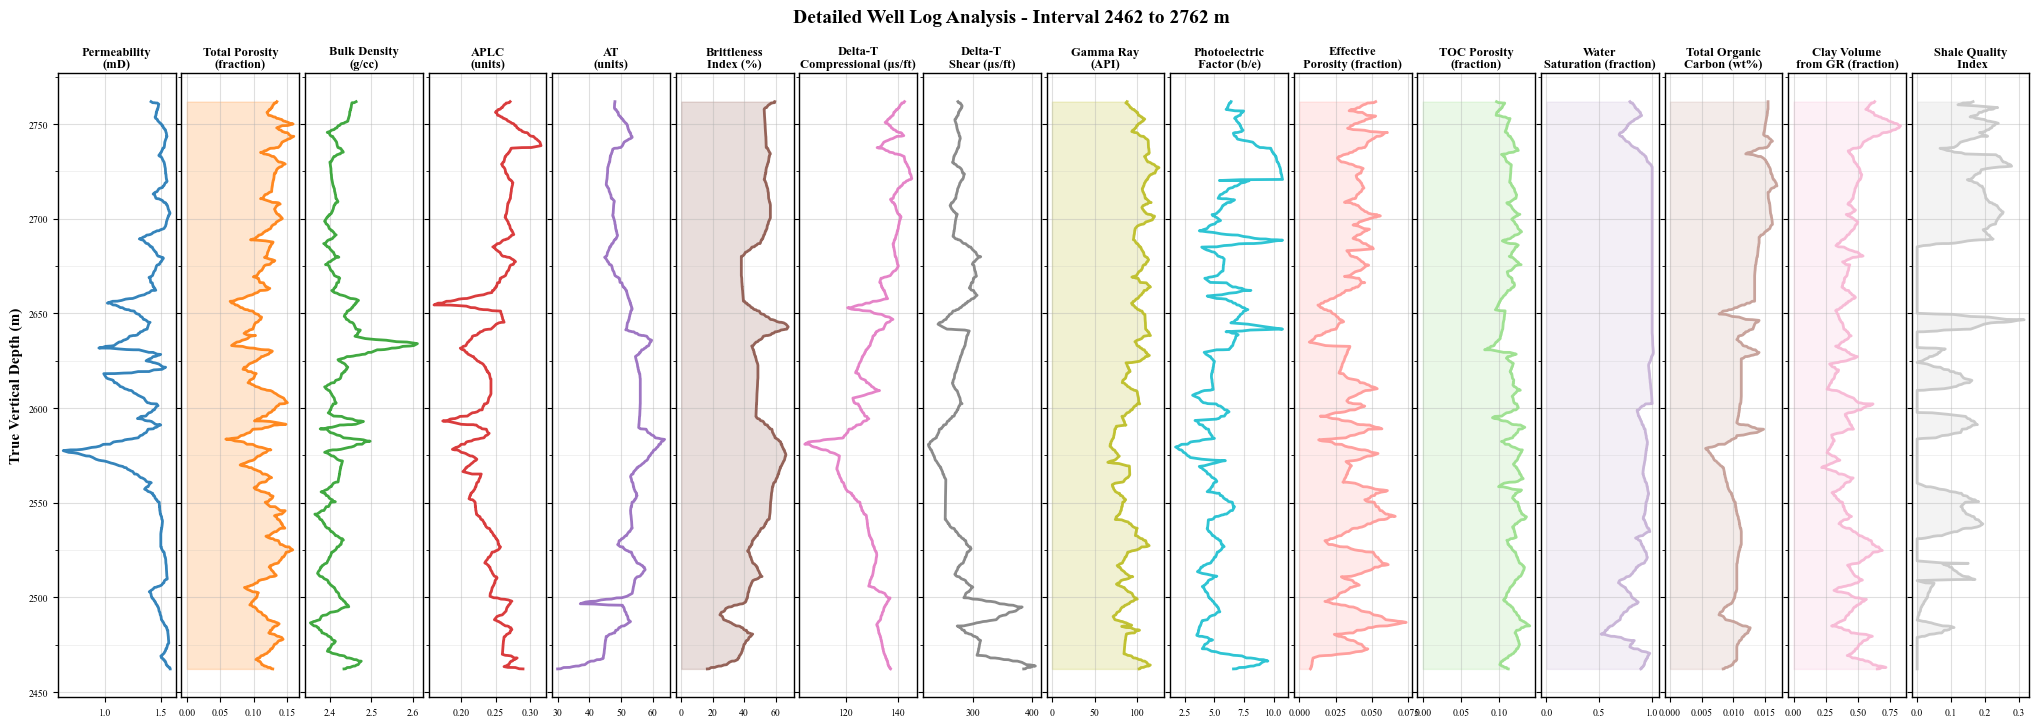

✓ Detailed interval plot also created
✓ Comprehensive well log plots saved in PNG, PDF, and EPS formats
✓ Total tracks displayed: 16
✓ Depth interval: 1512 - 3712 m
✓ Data points: 7699

=== TRACK CONFIGURATION SUMMARY ===
Perm     - Petrophysical - LOG    - LINE
PHIT     - Petrophysical - LINEAR - FILLED
Rhob     - Petrophysical - LINEAR - LINE
APLC     - Engineering  - LINEAR - LINE
AT       - Engineering  - LINEAR - LINE
BI       - Geomechanical - LINEAR - FILLED
DTC      - Geomechanical - LINEAR - LINE
DTS      - Geomechanical - LINEAR - LINE
GRn      - Petrophysical - LINEAR - FILLED
PEF      - Petrophysical - LINEAR - LINE
PHIE     - Petrophysical - LINEAR - FILLED
PHITOC   - Petrophysical - LINEAR - FILLED
SwSim    - Petrophysical - LINEAR - FILLED
TOC      - Geochemical  - LINEAR - FILLED
VCLGR    - Geochemical  - LINEAR - FILLED
SQI      - Composite    - LINEAR - FILLED


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.patches as mpatches

# Set professional style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 9,
    'axes.linewidth': 1.0,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none',
    'grid.alpha': 0.3
})

# Read and prepare data
df = pd.read_excel("Merged_Interpolated_NoDup_All_SQIinclude.xlsx")
df = df.sort_values(by="TVD", ascending=True)

# Define tracks dengan kategori dan properties
track_config = {
    'Perm': {
        'title': 'Permeability\n(mD)',
        'color': '#1f77b4',
        'log_scale': True,
        'category': 'Petrophysical',
        'fill': False
    },
    'PHIT': {
        'title': 'Total Porosity\n(fraction)',
        'color': '#ff7f0e',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': True
    },
    'Rhob': {
        'title': 'Bulk Density\n(g/cc)',
        'color': '#2ca02c',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': False
    },
    'APLC': {
        'title': 'APLC\n(units)',
        'color': '#d62728',
        'log_scale': False,
        'category': 'Engineering',
        'fill': False
    },
    'AT': {
        'title': 'AT\n(units)',
        'color': '#9467bd',
        'log_scale': False,
        'category': 'Engineering',
        'fill': False
    },
    'BI': {
        'title': 'Brittleness\nIndex (%)',
        'color': '#8c564b',
        'log_scale': False,
        'category': 'Geomechanical',
        'fill': True
    },
    'DTC': {
        'title': 'Delta-T\nCompressional (μs/ft)',
        'color': '#e377c2',
        'log_scale': False,
        'category': 'Geomechanical',
        'fill': False
    },
    'DTS': {
        'title': 'Delta-T\nShear (μs/ft)',
        'color': '#7f7f7f',
        'log_scale': False,
        'category': 'Geomechanical',
        'fill': False
    },
    'GRn': {
        'title': 'Gamma Ray\n(API)',
        'color': '#bcbd22',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': True
    },
    'PEF': {
        'title': 'Photoelectric\nFactor (b/e)',
        'color': '#17becf',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': False
    },
    'PHIE': {
        'title': 'Effective\nPorosity (fraction)',
        'color': '#ff9896',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': True
    },
    'PHITOC': {
        'title': 'TOC Porosity\n(fraction)',
        'color': '#98df8a',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': True
    },
    'SwSim': {
        'title': 'Water\nSaturation (fraction)',
        'color': '#c5b0d5',
        'log_scale': False,
        'category': 'Petrophysical',
        'fill': True
    },
    'TOC': {
        'title': 'Total Organic\nCarbon (wt%)',
        'color': '#c49c94',
        'log_scale': False,
        'category': 'Geochemical',
        'fill': True
    },
    'VCLGR': {
        'title': 'Clay Volume\nfrom GR (fraction)',
        'color': '#f7b6d3',
        'log_scale': False,
        'category': 'Geochemical',
        'fill': True
    },
    'SQI': {
        'title': 'Shale Quality\n Index',
        'color': '#c7c7c7',
        'log_scale': False,
        'category': 'Composite',
        'fill': True
    }
}

# Create figure dengan aspect ratio yang optimal untuk paper
cols = list(track_config.keys())
fig_width = len(cols) * 1.2 + 2  # Dynamic width berdasarkan jumlah tracks
fig_height = 12

fig, axes = plt.subplots(nrows=1, ncols=len(cols), 
                        figsize=(fig_width, fig_height), 
                        sharey=True, facecolor='white')

# Adjust spacing
plt.subplots_adjust(wspace=0.05, left=0.05, right=0.98, top=0.92, bottom=0.08)

# Depth range
depth_min = df['TVD'].min()
depth_max = df['TVD'].max()

# Plot each track
for i, (ax, col) in enumerate(zip(axes, cols)):
    config = track_config[col]
    
    # Set background
    ax.set_facecolor('white')
    
    # Major and minor grid
    ax.yaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(MultipleLocator(50))
    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.4, color='#cccccc')
    ax.grid(True, which='minor', linestyle='-', linewidth=0.4, alpha=0.3, color='#dddddd')
    
    # Handle data preparation
    x_data = df[col].dropna()
    y_data = df.loc[x_data.index, 'TVD']
    
    # Plot curve
    if config['log_scale'] and col == 'Perm':
        # Special handling untuk permeability (semilog)
        x_data = np.log10(x_data.clip(lower=0.001))  # Avoid log(0)
        ax.plot(x_data, y_data, color=config['color'], linewidth=1.5, alpha=0.9)
        ax.set_xlabel('log₁₀(Perm)', fontsize=8)
    else:
        ax.plot(x_data, y_data, color=config['color'], linewidth=1.5, alpha=0.9)
    
    # Fill area untuk parameter tertentu
    if config['fill']:
        if config['log_scale'] and col == 'Perm':
            ax.fill_betweenx(y_data, x_data.min(), x_data, 
                           color=config['color'], alpha=0.15)
        else:
            ax.fill_betweenx(y_data, 0, x_data, 
                           color=config['color'], alpha=0.15)
    
    # Invert Y-axis
    ax.invert_yaxis()
    
    # Set axis limits dengan margin yang tepat
    if not config['log_scale']:
        data_range = x_data.max() - x_data.min()
        margin = data_range * 0.05
        ax.set_xlim(x_data.min() - margin, x_data.max() + margin)
    
    # Track header styling
    ax.set_xlabel(config['title'], fontsize=9, fontweight='bold', 
                 labelpad=8, color='#333333')
    ax.xaxis.set_label_position('top')
    
    # Tick styling
    ax.tick_params(axis='both', which='major', labelsize=7, colors='black', 
                  length=4, width=0.8)
    ax.tick_params(axis='both', which='minor', length=2, width=0.6)
    ax.tick_params(axis='x', rotation=45)
    
    # Border styling
    for spine in ax.spines.values():
        spine.set_linewidth(1.0)
        spine.set_color('#555555')
    
    # Special formatting untuk different parameters
    if col in ['PHIT', 'PHIE', 'PHITOC', 'SwSim']:
        ax.xaxis.set_major_locator(MultipleLocator(0.1))
    elif col == 'GRn':
        ax.xaxis.set_major_locator(MultipleLocator(50))
    elif col == 'TOC':
        ax.xaxis.set_major_locator(MultipleLocator(2))
    elif col in ['DTC', 'DTS']:
        ax.xaxis.set_major_locator(MultipleLocator(20))

# Depth axis styling
axes[0].set_ylabel('True Vertical Depth (m)', fontsize=11, fontweight='bold', 
                  color='#333333', labelpad=10)

# Set consistent depth range untuk all axes
for ax in axes:
    ax.set_ylim(depth_max + 50, depth_min - 50)

# Add category colors as background rectangles (very subtle)
category_colors = {
    'Petrophysical': '#E3F2FD',
    'Geomechanical': '#FCE4EC',
    'Engineering': '#FFF3E0',
    'Geochemical': '#E8F5E8',
    'Composite': '#F3E5F5'
}

for i, (ax, col) in enumerate(zip(axes, cols)):
    category = track_config[col]['category']
    if category in category_colors:
        ax.axvspan(ax.get_xlim()[0], ax.get_xlim()[1], 
                  alpha=0.05, color=category_colors[category], zorder=0)

# Create legend untuk categories
legend_elements = []
for category, color in category_colors.items():
    if any(track_config[col]['category'] == category for col in cols):
        legend_elements.append(mpatches.Patch(color=color, alpha=0.3, label=category))

# Add legend
fig.legend(handles=legend_elements, title='Parameter Categories',
          loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=len(legend_elements),
          fontsize=9, title_fontsize=10, frameon=True, fancybox=True)

# Add well information (customize sesuai data Anda)
well_info = f"Total Depth Range: {depth_min:.0f} - {depth_max:.0f} m | Data Points: {len(df)}"
fig.text(0.5, 0.94, well_info, ha='center', fontsize=10, style='italic', alpha=0.8)

# Save high-quality figures
plt.savefig('comprehensive_well_log.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', pad_inches=0.1)

plt.savefig('comprehensive_well_log.pdf', dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none', pad_inches=0.1)

# Save juga dalam format EPS untuk journal submissions
plt.savefig('comprehensive_well_log.eps', dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none', pad_inches=0.1, format='eps')

plt.tight_layout()
plt.show()

# OPTIONAL: Create zoomed version untuk interval tertentu
if len(df) > 1000:  # Jika data terlalu banyak, buat zoomed version
    
    # Select interval dengan variasi data terbesar
    mid_depth = (depth_min + depth_max) / 2
    zoom_interval = 300  # meter
    zoom_df = df[(df['TVD'] >= mid_depth - zoom_interval/2) & 
                (df['TVD'] <= mid_depth + zoom_interval/2)]
    
    if len(zoom_df) > 50:  # Pastikan ada cukup data
        fig_zoom, axes_zoom = plt.subplots(nrows=1, ncols=len(cols), 
                                         figsize=(fig_width, 8), 
                                         sharey=True, facecolor='white')
        
        plt.subplots_adjust(wspace=0.05, left=0.05, right=0.98, top=0.90, bottom=0.12)
        
        for i, (ax, col) in enumerate(zip(axes_zoom, cols)):
            config = track_config[col]
            ax.set_facecolor('white')
            
            # Grid
            ax.yaxis.set_major_locator(MultipleLocator(50))
            ax.yaxis.set_minor_locator(MultipleLocator(25))
            ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.4)
            ax.grid(True, which='minor', linestyle='-', linewidth=0.4, alpha=0.3)
            
            # Plot
            x_data = zoom_df[col].dropna()
            y_data = zoom_df.loc[x_data.index, 'TVD']
            
            if config['log_scale'] and col == 'Perm':
                x_data = np.log10(x_data.clip(lower=0.001))
            
            ax.plot(x_data, y_data, color=config['color'], linewidth=2.0, alpha=0.9)
            
            if config['fill']:
                if config['log_scale'] and col == 'Perm':
                    ax.fill_betweenx(y_data, x_data.min(), x_data, 
                                   color=config['color'], alpha=0.2)
                else:
                    ax.fill_betweenx(y_data, 0, x_data, 
                                   color=config['color'], alpha=0.2)
            
            ax.invert_yaxis()
            ax.set_xlabel(config['title'], fontsize=9, fontweight='bold')
            ax.xaxis.set_label_position('top')
            ax.tick_params(axis='both', labelsize=7)
        
        axes_zoom[0].set_ylabel('True Vertical Depth (m)', fontsize=11, fontweight='bold')
        
        plt.suptitle(f'Detailed Well Log Analysis - Interval {mid_depth-zoom_interval/2:.0f} to {mid_depth+zoom_interval/2:.0f} m', 
                    fontsize=14, fontweight='bold')
        
        plt.savefig('comprehensive_well_log_detailed.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✓ Detailed interval plot also created")

print("✓ Comprehensive well log plots saved in PNG, PDF, and EPS formats")
print(f"✓ Total tracks displayed: {len(cols)}")
print(f"✓ Depth interval: {depth_min:.0f} - {depth_max:.0f} m")
print(f"✓ Data points: {len(df)}")

# Print track summary
print("\n=== TRACK CONFIGURATION SUMMARY ===")
for col, config in track_config.items():
    print(f"{col:8s} - {config['category']:12s} - {'LOG' if config.get('log_scale') else 'LINEAR':6s} - {'FILLED' if config['fill'] else 'LINE'}")

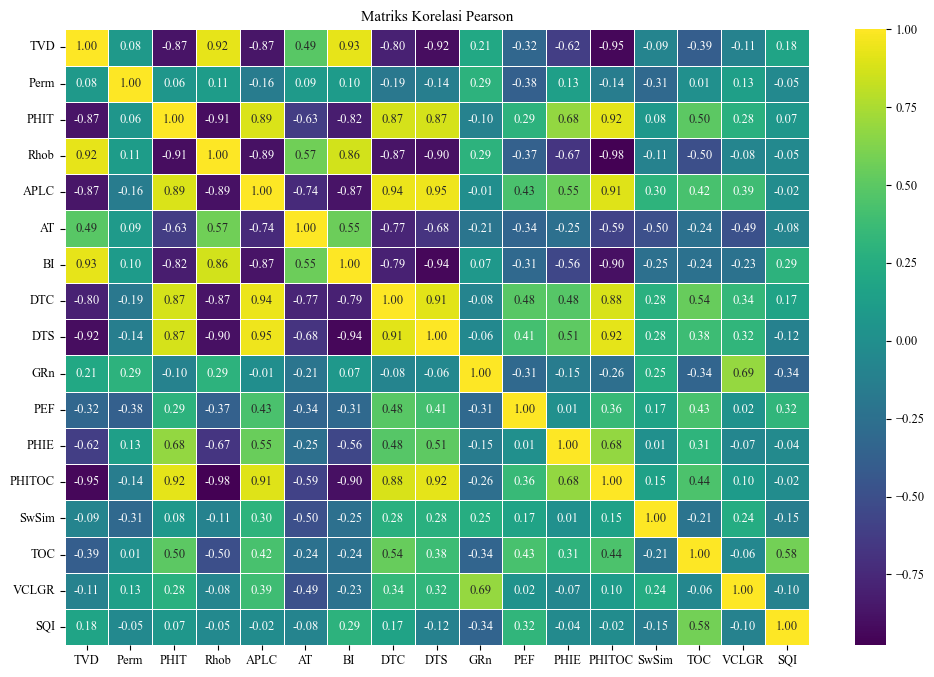

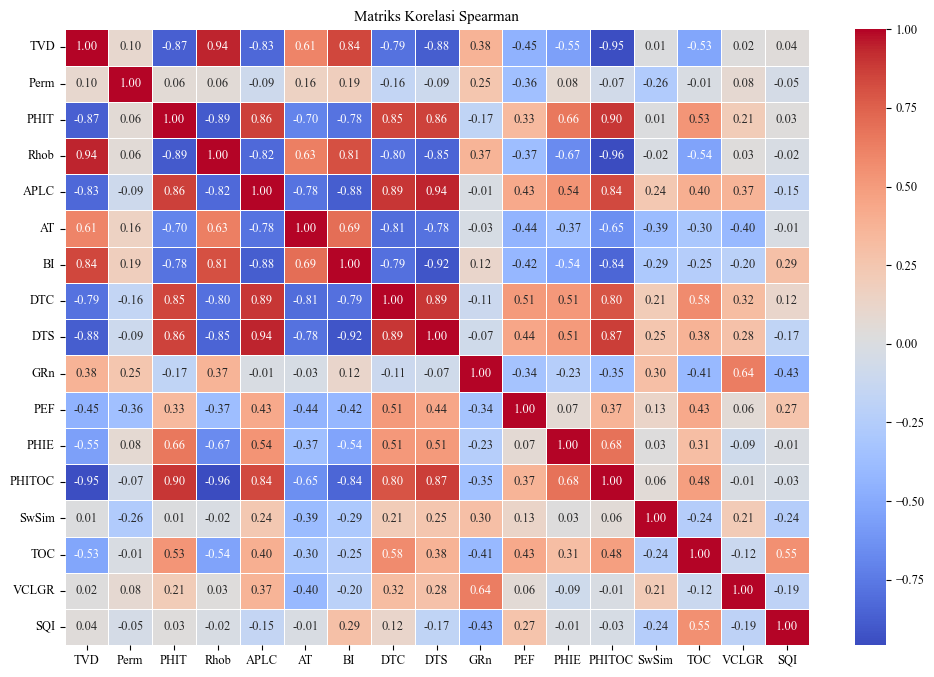

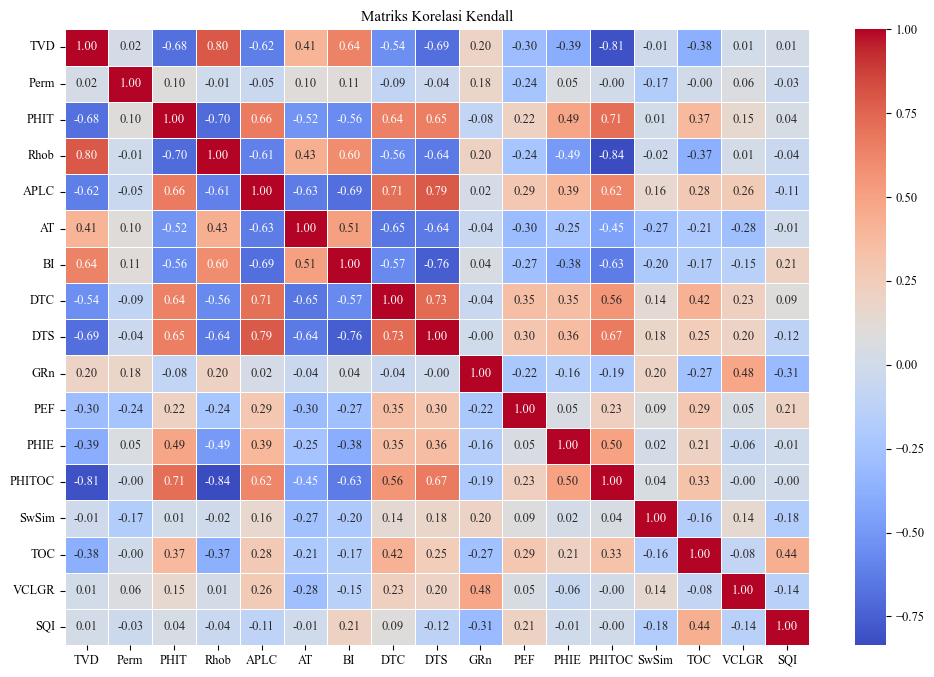

In [42]:
# 1. HItung matriks korealsi Pearson
correlation_matrix = df.corr(numeric_only=True)  # Pastikan kolom numerik


# 2. Visualisasi dengan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="viridis",
            fmt = ".2f",
            linewidths=0.5)
plt.title("Matriks Korelasi Pearson")
plt.show()

# 3. Visualisasi dengan korelasi Spearman
corr_spearman = df.corr(method='spearman',numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_spearman,
            annot=True,
            cmap="coolwarm",
            fmt = ".2f",
            linewidths=0.5)
plt.title("Matriks Korelasi Spearman")
plt.show()

# 4. Visualisasi dengan korelasi Kendall
corr_kendall = df.corr(method='kendall', numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_kendall,
            annot=True,
            cmap="coolwarm",
            fmt = ".2f",
            linewidths=0.5)
plt.title("Matriks Korelasi Kendall")
plt.show()

In [43]:
# Feature and target

X = df[["TVD","Perm","PHIT","Rhob","APLC","AT","BI","DTC","DTS","GRn","PEF","PHIE","PHITOC","SwSim","TOC","VCLGR"]]
y = df["SQI"]

# Preprocessing 
numeric_features = ["TVD","Perm","PHIT","Rhob","APLC","AT","BI","DTC","DTS","GRn","PEF","PHIE","PHITOC","SwSim","TOC","VCLGR"]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(),numeric_features)
])

# Pembagian data train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Terapkan preprocessor: .fit_transform() pada data latih, .transform() pada data uji
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build XG-Boost model

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_processed,y_train)

# Prediksi
y_pred = model.predict(X_test_processed)

#Hitung metrik MSE dan R-Squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan semua metrik
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0055
Mean Squared Error (MSE): 0.0001
R-squared (R²): 0.9789


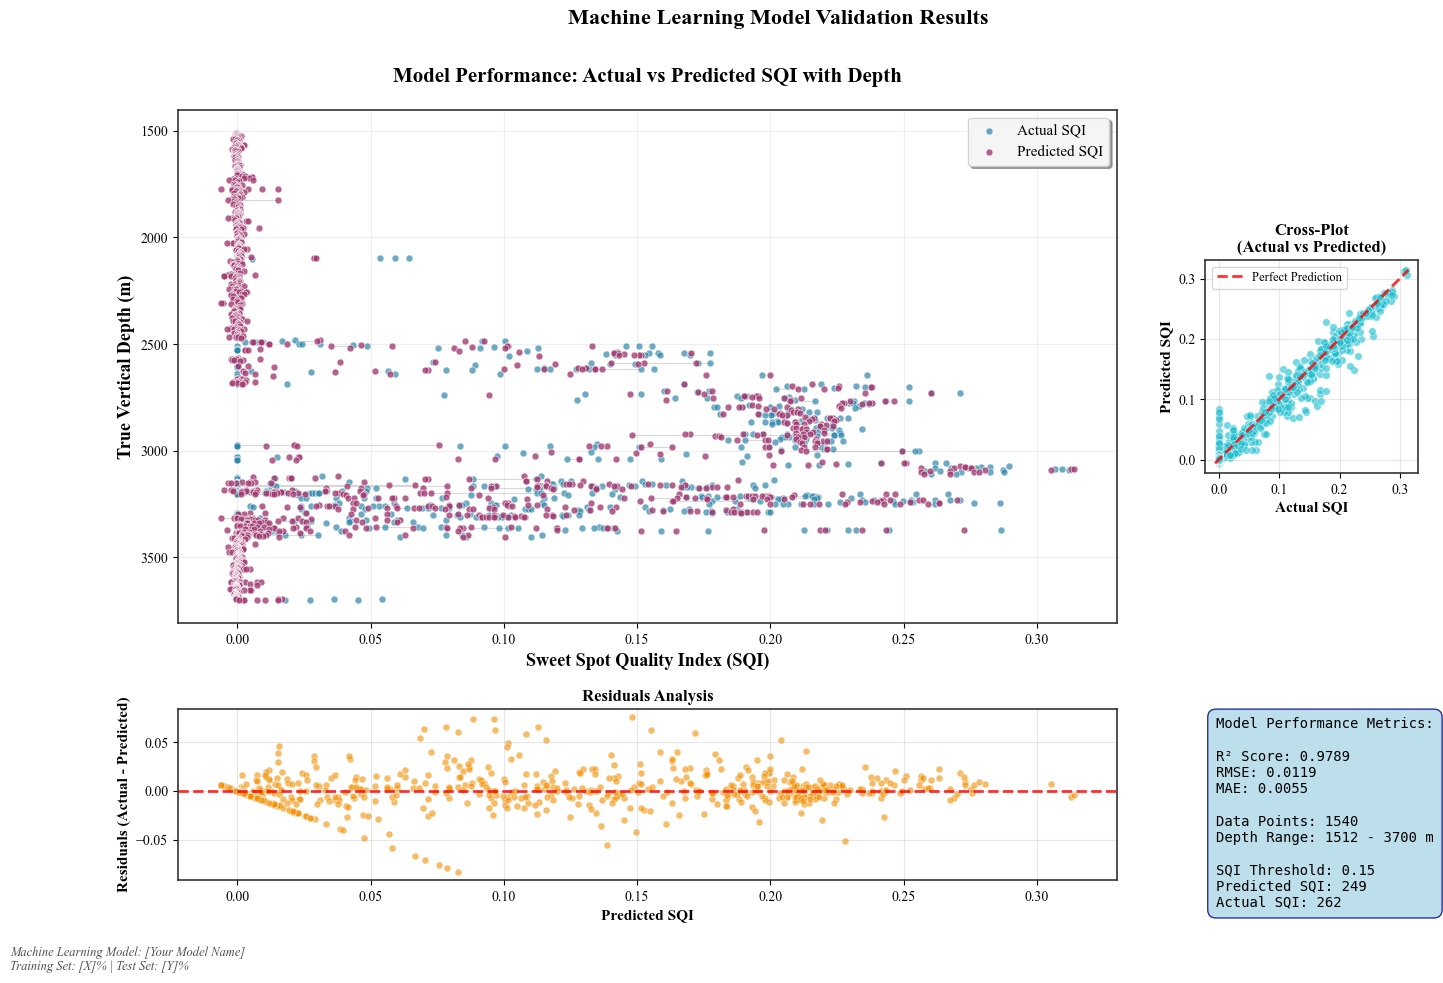

✓ ML validation plots saved in PNG and PDF formats
✓ Model Performance - R²: 0.9789, RMSE: 0.0119, MAE: 0.0055


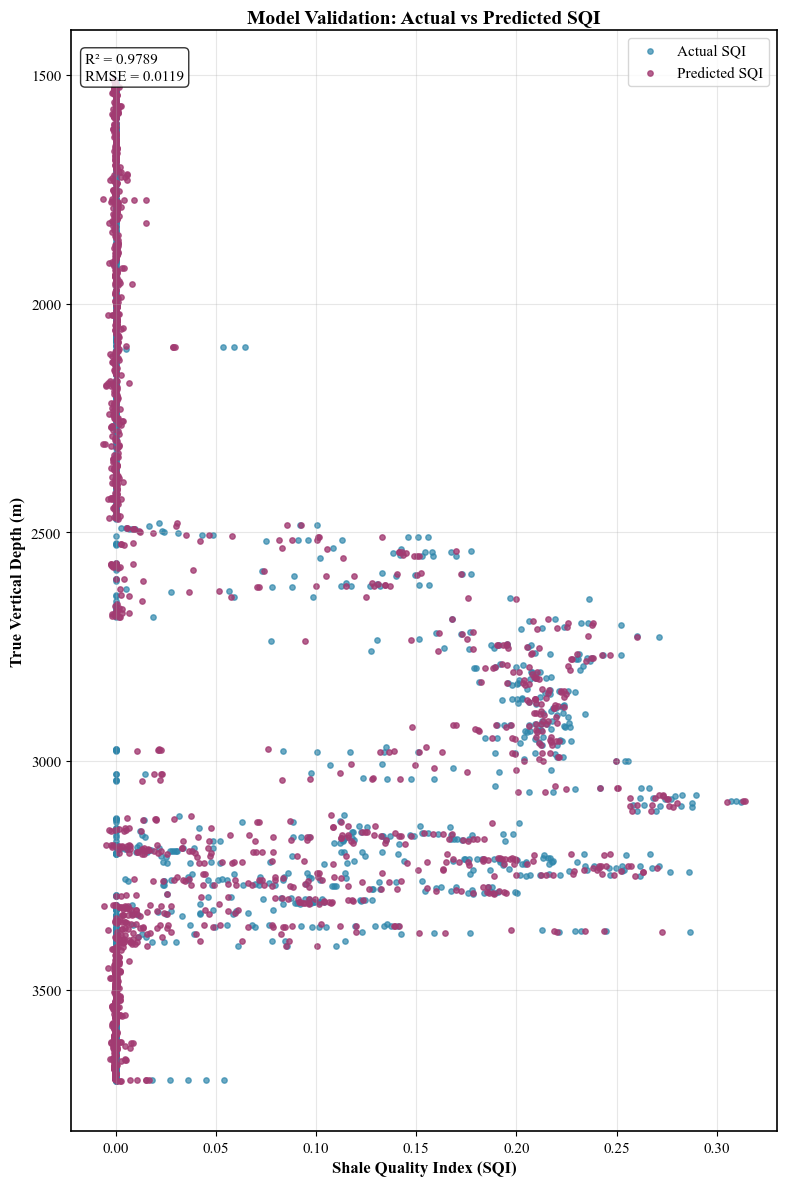

✓ Simplified version also saved for paper use


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib.patches import Rectangle
import seaborn as sns

# Set professional style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 11,
    'axes.linewidth': 1.2,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none'
})

# Prepare data
plot_df = pd.DataFrame({
    "TVD": X_test["TVD"],
    "Actual SQI": y_test,
    "Predicted SQI": y_pred
})

# Sort by depth
plot_df = plot_df.sort_values(by='TVD').reset_index(drop=True)

# Calculate performance metrics
r2 = r2_score(plot_df['Actual SQI'], plot_df['Predicted SQI'])
rmse = np.sqrt(mean_squared_error(plot_df['Actual SQI'], plot_df['Predicted SQI']))
mae = mean_absolute_error(plot_df['Actual SQI'], plot_df['Predicted SQI'])

# Create figure with subplots
fig = plt.figure(figsize=(16, 10), facecolor='white')

# Create grid layout
gs = fig.add_gridspec(2, 3, height_ratios=[3, 1], width_ratios=[2, 2, 1], 
                     hspace=0.25, wspace=0.25)

# Main depth plot
ax1 = fig.add_subplot(gs[0, :2])

# Scatter plots dengan transparansi dan ukuran yang lebih baik
scatter1 = ax1.scatter(plot_df['Actual SQI'], plot_df['TVD'], 
                      c='#2E86AB', s=25, alpha=0.7, 
                      edgecolors='white', linewidth=0.5,
                      label='Actual SQI', zorder=3)

scatter2 = ax1.scatter(plot_df['Predicted SQI'], plot_df['TVD'], 
                      c='#A23B72', s=25, alpha=0.8, 
                      edgecolors='white', linewidth=0.5,
                      label='Predicted SQI', zorder=3)

# Add connecting lines untuk menunjukkan residual (opsional)
for i in range(0, len(plot_df), 10):  # Setiap 10 point untuk menghindari clutter
    ax1.plot([plot_df['Actual SQI'].iloc[i], plot_df['Predicted SQI'].iloc[i]], 
            [plot_df['TVD'].iloc[i], plot_df['TVD'].iloc[i]], 
            'gray', alpha=0.3, linewidth=0.8, zorder=1)

# Invert Y-axis
ax1.invert_yaxis()

# Styling main plot
ax1.set_xlabel('Sweet Spot Quality Index (SQI)', fontsize=13, fontweight='bold')
ax1.set_ylabel('True Vertical Depth (m)', fontsize=13, fontweight='bold')
ax1.set_title('Model Performance: Actual vs Predicted SQI with Depth', 
             fontsize=15, fontweight='bold', pad=20)

# Grid yang lebih profesional
ax1.grid(True, linestyle='-', alpha=0.3, linewidth=0.8, color='#cccccc')
ax1.set_axisbelow(True)

# Legend yang lebih baik
legend = ax1.legend(fontsize=11, frameon=True, fancybox=True, 
                   shadow=True, framealpha=0.9, loc='upper right')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#cccccc')

# Set axis limits dengan margin
x_margin = (plot_df[['Actual SQI', 'Predicted SQI']].max().max() - 
           plot_df[['Actual SQI', 'Predicted SQI']].min().min()) * 0.05
ax1.set_xlim(plot_df[['Actual SQI', 'Predicted SQI']].min().min() - x_margin,
            plot_df[['Actual SQI', 'Predicted SQI']].max().max() + x_margin)

# Cross-plot (Actual vs Predicted)
ax2 = fig.add_subplot(gs[0, 2])

# Scatter plot
ax2.scatter(plot_df['Actual SQI'], plot_df['Predicted SQI'], 
           c='#17becf', s=30, alpha=0.6, edgecolors='white', linewidth=0.5)

# Perfect prediction line (y=x)
min_val = min(plot_df['Actual SQI'].min(), plot_df['Predicted SQI'].min())
max_val = max(plot_df['Actual SQI'].max(), plot_df['Predicted SQI'].max())
ax2.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, alpha=0.8, label='Perfect Prediction')

# Styling cross-plot
ax2.set_xlabel('Actual SQI', fontsize=11, fontweight='bold')
ax2.set_ylabel('Predicted SQI', fontsize=11, fontweight='bold')
ax2.set_title('Cross-Plot\n(Actual vs Predicted)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)

# Set equal aspect ratio
ax2.set_aspect('equal', adjustable='box')

# Residuals plot
ax3 = fig.add_subplot(gs[1, :2])

residuals = plot_df['Actual SQI'] - plot_df['Predicted SQI']
ax3.scatter(plot_df['Predicted SQI'], residuals, 
           c='#F18F01', s=25, alpha=0.6, edgecolors='white', linewidth=0.5)

# Zero line
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Styling residuals
ax3.set_xlabel('Predicted SQI', fontsize=11, fontweight='bold')
ax3.set_ylabel('Residuals (Actual - Predicted)', fontsize=11, fontweight='bold')
ax3.set_title('Residuals Analysis', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Statistics panel
ax4 = fig.add_subplot(gs[1, 2])
ax4.axis('off')

# Create statistics text
stats_text = f'''Model Performance Metrics:

R² Score: {r2:.4f}
RMSE: {rmse:.4f}
MAE: {mae:.4f}

Data Points: {len(plot_df)}
Depth Range: {plot_df['TVD'].min():.0f} - {plot_df['TVD'].max():.0f} m

SQI Threshold: 0.15
Predicted SQI: {(plot_df['Predicted SQI'] > 0.15).sum()}
Actual SQI: {(plot_df['Actual SQI'] > 0.15).sum()}'''

# Add statistics box
bbox_props = dict(boxstyle="round,pad=0.6", facecolor='lightblue', 
                 alpha=0.8, edgecolor='navy', linewidth=1)
ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=bbox_props, family='monospace')

# Overall styling
for ax in [ax1, ax2, ax3]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')
    ax.tick_params(axis='both', which='major', labelsize=10, colors='black')

# Add model info (sesuaikan dengan model Anda)
model_info = "Machine Learning Model: [Your Model Name]\nTraining Set: [X]% | Test Set: [Y]%"
fig.text(0.02, 0.02, model_info, fontsize=9, style='italic', alpha=0.7)

plt.suptitle('Machine Learning Model Validation Results', 
            fontsize=16, fontweight='bold', y=0.98)

# Save high-quality figures
plt.savefig('ml_model_validation.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', pad_inches=0.2)

plt.savefig('ml_model_validation.pdf', dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none', pad_inches=0.2)

plt.tight_layout()
plt.show()

print("✓ ML validation plots saved in PNG and PDF formats")
print(f"✓ Model Performance - R²: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# OPTIONAL: Create simplified version jika diperlukan untuk paper
fig_simple, ax_simple = plt.subplots(figsize=(8, 12), facecolor='white')

# Simple version dengan styling yang clean
ax_simple.scatter(plot_df['Actual SQI'], plot_df['TVD'], 
                 c='#2E86AB', s=15, alpha=0.7, label='Actual SQI')
ax_simple.scatter(plot_df['Predicted SQI'], plot_df['TVD'], 
                 c='#A23B72', s=15, alpha=0.8, label='Predicted SQI')

ax_simple.invert_yaxis()
ax_simple.set_xlabel('Shale Quality Index (SQI)', fontsize=12, fontweight='bold')
ax_simple.set_ylabel('True Vertical Depth (m)', fontsize=12, fontweight='bold')
ax_simple.set_title('Model Validation: Actual vs Predicted SQI', 
                   fontsize=14, fontweight='bold')
ax_simple.grid(True, alpha=0.3)
ax_simple.legend(fontsize=11)

# Add R² to simple plot
ax_simple.text(0.02, 0.98, f'R² = {r2:.4f}\nRMSE = {rmse:.4f}', 
              transform=ax_simple.transAxes, fontsize=11,
              verticalalignment='top',
              bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('ml_validation_simple.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none')
plt.show()

print("✓ Simplified version also saved for paper use")

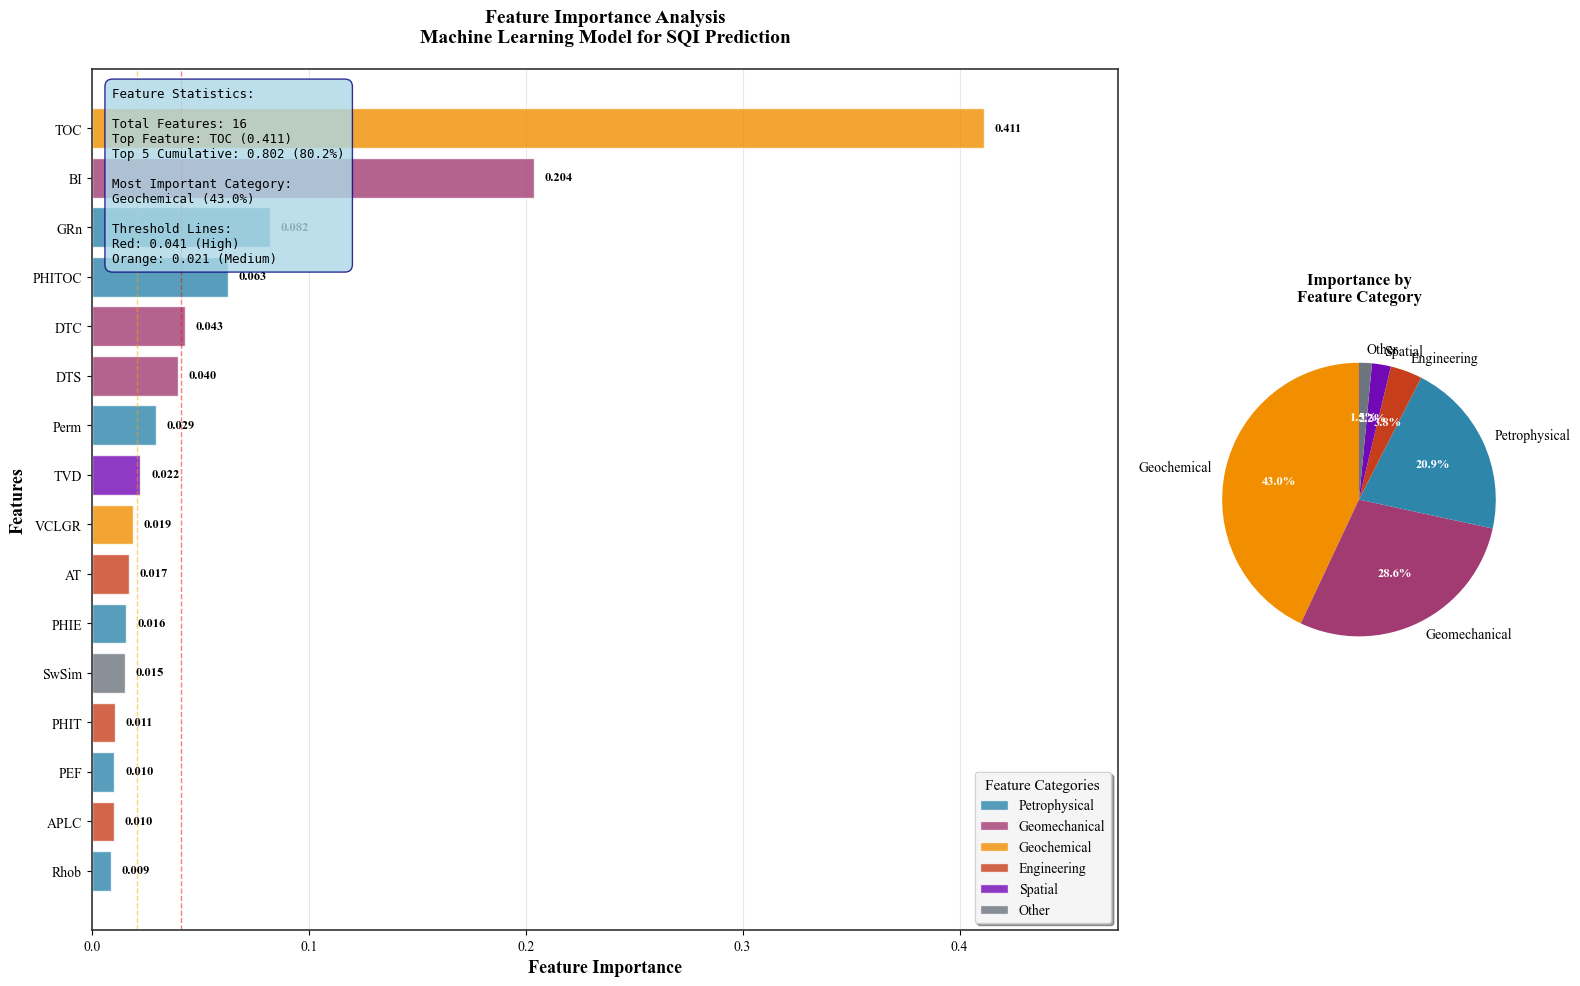

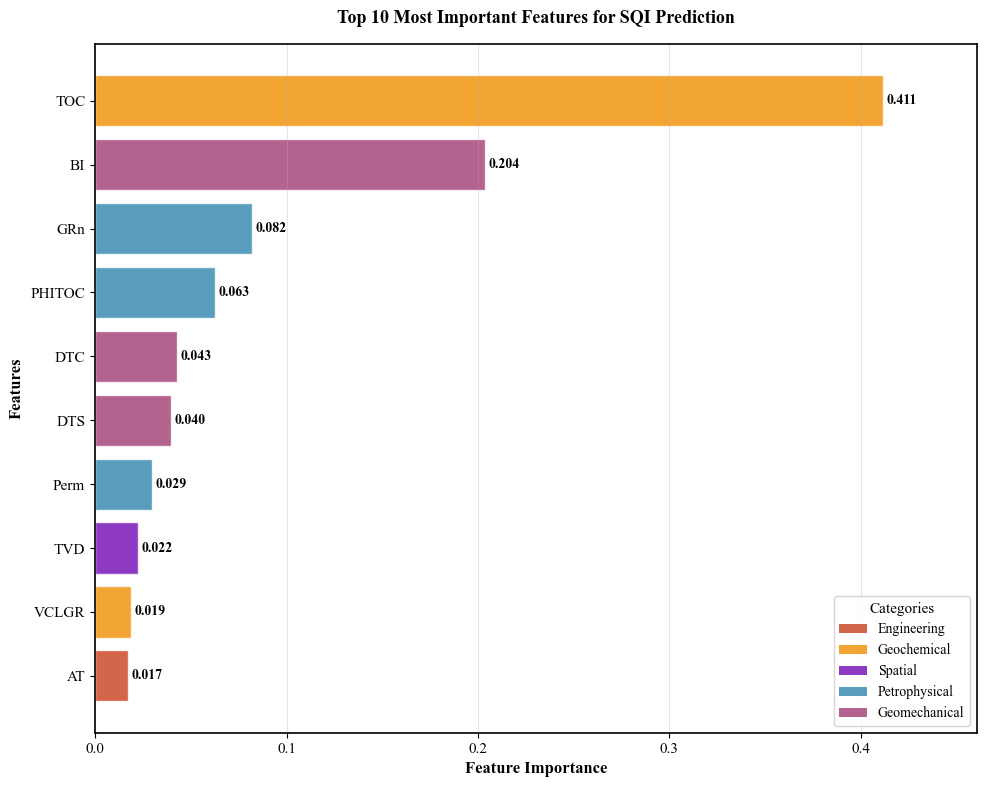

✓ Feature importance plots saved in PNG and PDF formats
✓ Total features analyzed: 16
✓ Most important feature: TOC (0.411)
✓ Most important category: Geochemical (43.0%)

=== TOP 10 FEATURE RANKING ===
 1. AT       - 0.0171 (Engineering)
 2. VCLGR    - 0.0188 (Geochemical)
 3. TVD      - 0.0223 (Spatial)
 4. Perm     - 0.0295 (Petrophysical)
 5. DTS      - 0.0396 (Geomechanical)
 6. DTC      - 0.0427 (Geomechanical)
 7. PHITOC   - 0.0626 (Petrophysical)
 8. GRn      - 0.0820 (Petrophysical)
 9. BI       - 0.2036 (Geomechanical)
10. TOC      - 0.4113 (Geochemical)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

# Set professional style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 11,
    'axes.linewidth': 1.2,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'savefig.edgecolor': 'none'
})

# Get feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Create dataframe untuk sorting dan analysis
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=True)  # Sort ascending untuk horizontal bar

# Definisikan kategori features untuk color coding
feature_categories = {
    # Geological/Petrophysical
    'GRn': 'Petrophysical',
    'PEF': 'Petrophysical', 
    'PHIE': 'Petrophysical',
    'PHITOC': 'Petrophysical',
    'Perm': 'Petrophysical',
    'Rhob': 'Petrophysical',
    
    # Geomechanical
    'BI': 'Geomechanical',
    'DTC': 'Geomechanical',
    'DTS': 'Geomechanical',
    
    # Geochemical
    'TOC': 'Geochemical',
    'VCLGR': 'Geochemical',
    'SiSim': 'Geochemical',
    
    # Completion/Engineering
    'APLC': 'Engineering',
    'AT': 'Engineering',
    'PHIT': 'Engineering',
    
    # Depth
    'TVD': 'Spatial'
}

# Assign categories
feature_df['Category'] = feature_df['Feature'].map(feature_categories)
feature_df['Category'] = feature_df['Category'].fillna('Other')

# Color palette untuk categories
category_colors = {
    'Petrophysical': '#2E86AB',
    'Geomechanical': '#A23B72', 
    'Geochemical': '#F18F01',
    'Engineering': '#C73E1D',
    'Spatial': '#7209B7',
    'Other': '#6C757D'
}

# Map colors
feature_df['Color'] = feature_df['Category'].map(category_colors)

# Create figure dengan layout yang lebih baik
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), 
                              gridspec_kw={'width_ratios': [3, 1]})

# === MAIN FEATURE IMPORTANCE PLOT ===
bars = ax1.barh(range(len(feature_df)), feature_df['Importance'], 
                color=feature_df['Color'], alpha=0.8, edgecolor='white', linewidth=1)

# Customize main plot
ax1.set_yticks(range(len(feature_df)))
ax1.set_yticklabels(feature_df['Feature'], fontsize=11)
ax1.set_xlabel('Feature Importance', fontsize=13, fontweight='bold')
ax1.set_ylabel('Features', fontsize=13, fontweight='bold')
ax1.set_title('Feature Importance Analysis\nMachine Learning Model for SQI Prediction', 
             fontsize=14, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, feature_df['Importance'])):
    width = bar.get_width()
    ax1.text(width + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{importance:.3f}', 
            ha='left', va='center', fontsize=9, fontweight='bold')

# Grid untuk readability
ax1.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.8)
ax1.set_axisbelow(True)

# Set x-axis limits dengan margin
max_importance = feature_df['Importance'].max()
ax1.set_xlim(0, max_importance * 1.15)

# Add vertical lines untuk reference
ax1.axvline(x=max_importance * 0.1, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax1.axvline(x=max_importance * 0.05, color='orange', linestyle='--', alpha=0.5, linewidth=1)

# === CATEGORY SUMMARY PIE CHART ===
category_importance = feature_df.groupby('Category')['Importance'].sum().sort_values(ascending=False)

wedges, texts, autotexts = ax2.pie(category_importance.values, 
                                  labels=category_importance.index,
                                  colors=[category_colors[cat] for cat in category_importance.index],
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 10})

ax2.set_title('Importance by\nFeature Category', fontsize=12, fontweight='bold', pad=20)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# === STATISTICS PANEL ===
# Add statistics text box
total_features = len(feature_df)
top_features = feature_df.tail(5)  # Top 5
cumulative_top5 = top_features['Importance'].sum()

stats_text = f'''Feature Statistics:

Total Features: {total_features}
Top Feature: {feature_df.iloc[-1]['Feature']} ({feature_df.iloc[-1]['Importance']:.3f})
Top 5 Cumulative: {cumulative_top5:.3f} ({cumulative_top5/feature_df['Importance'].sum()*100:.1f}%)

Most Important Category:
{category_importance.index[0]} ({category_importance.iloc[0]/feature_df['Importance'].sum()*100:.1f}%)

Threshold Lines:
Red: {max_importance * 0.1:.3f} (High)
Orange: {max_importance * 0.05:.3f} (Medium)'''

# Position text box
bbox_props = dict(boxstyle="round,pad=0.6", facecolor='lightblue', 
                 alpha=0.8, edgecolor='navy', linewidth=1)
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
         fontsize=9, verticalalignment='top',
         bbox=bbox_props, family='monospace')

# === LEGEND ===
# Create custom legend untuk categories
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.8, edgecolor='white')
                  for color in category_colors.values()]
legend_labels = list(category_colors.keys())

ax1.legend(legend_elements, legend_labels, 
          title='Feature Categories', title_fontsize=11,
          fontsize=10, loc='lower right', 
          frameon=True, fancybox=True, shadow=True, framealpha=0.9)

# === STYLING ===
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')

ax1.tick_params(axis='both', which='major', labelsize=10, colors='black')

# === SAVE HIGH QUALITY FIGURES ===
plt.tight_layout()
plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', pad_inches=0.2)

plt.savefig('feature_importance_analysis.pdf', dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none', pad_inches=0.2)

plt.show()

# === CREATE SIMPLIFIED VERSION FOR SPACE-CONSTRAINED PAPERS ===
fig_simple, ax_simple = plt.subplots(figsize=(10, 8), facecolor='white')

# Select only top 10 features untuk simplified version
top_10 = feature_df.tail(10)

bars_simple = ax_simple.barh(range(len(top_10)), top_10['Importance'], 
                            color=top_10['Color'], alpha=0.8, 
                            edgecolor='white', linewidth=1)

ax_simple.set_yticks(range(len(top_10)))
ax_simple.set_yticklabels(top_10['Feature'], fontsize=11)
ax_simple.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
ax_simple.set_ylabel('Features', fontsize=12, fontweight='bold')
ax_simple.set_title('Top 10 Most Important Features for SQI Prediction', 
                   fontsize=13, fontweight='bold', pad=15)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars_simple, top_10['Importance'])):
    width = bar.get_width()
    ax_simple.text(width + 0.002, bar.get_y() + bar.get_height()/2, 
                  f'{importance:.3f}', 
                  ha='left', va='center', fontsize=10, fontweight='bold')

ax_simple.grid(axis='x', alpha=0.3)
ax_simple.set_xlim(0, top_10['Importance'].max() * 1.12)

# Simple legend
unique_categories = top_10['Category'].unique()
legend_elements_simple = [plt.Rectangle((0,0),1,1, facecolor=category_colors[cat], alpha=0.8)
                         for cat in unique_categories]
ax_simple.legend(legend_elements_simple, unique_categories, 
                title='Categories', fontsize=10, loc='lower right')

plt.tight_layout()
plt.savefig('feature_importance_top10.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none')
plt.show()

print("✓ Feature importance plots saved in PNG and PDF formats")
print(f"✓ Total features analyzed: {total_features}")
print(f"✓ Most important feature: {feature_df.iloc[-1]['Feature']} ({feature_df.iloc[-1]['Importance']:.3f})")
print(f"✓ Most important category: {category_importance.index[0]} ({category_importance.iloc[0]/feature_df['Importance'].sum()*100:.1f}%)")

# Print ranking untuk reference
print("\n=== TOP 10 FEATURE RANKING ===")
for i, (idx, row) in enumerate(feature_df.tail(10).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:8s} - {row['Importance']:.4f} ({row['Category']})")

In [46]:
#  Terapkan preprocessor: .fit_transform() pada data latih, .transform() pada data uji
X_test_all_processed = preprocessor.transform(X)

# Prediksi
y_pred_all = model.predict(X_test_all_processed)

#Hitung metrik MSE dan R-Squared
mse13 = mean_squared_error(y, y_pred_all)
mae13 = mean_absolute_error(y, y_pred_all)
r213 = r2_score(y, y_pred_all)

# Tampilkan semua metrik
print(f"Mean Absolute Error (MAE): {mae13:.4f}")
print(f"Mean Squared Error (MSE13): {mse13:.4f}")
print(f"R-squared (R²): {r213:.4f}")


Mean Absolute Error (MAE): 0.0039
Mean Squared Error (MSE13): 0.0001
R-squared (R²): 0.9914


In [47]:
# Buat dataframe baru dari data uji (yang belum diproses) untuk plotting

plot_df_2 = pd.DataFrame({
    "TVD" : X["TVD"],
    "Predicted SQI" : y_pred_all
})

# Urutkan data berdasarkan kedalaman (TVD) agar grafik tergambar dengan benar
plot_df = plot_df.sort_values(by='TVD').reset_index(drop=True)

df["Predicted SQI"] = plot_df_2["Predicted SQI"].values

for i in range (len(df["Predicted SQI"])) :
    if df["Predicted SQI"].iloc[i] < 0 :
        df["Predicted SQI"].iloc[i] = 0
    


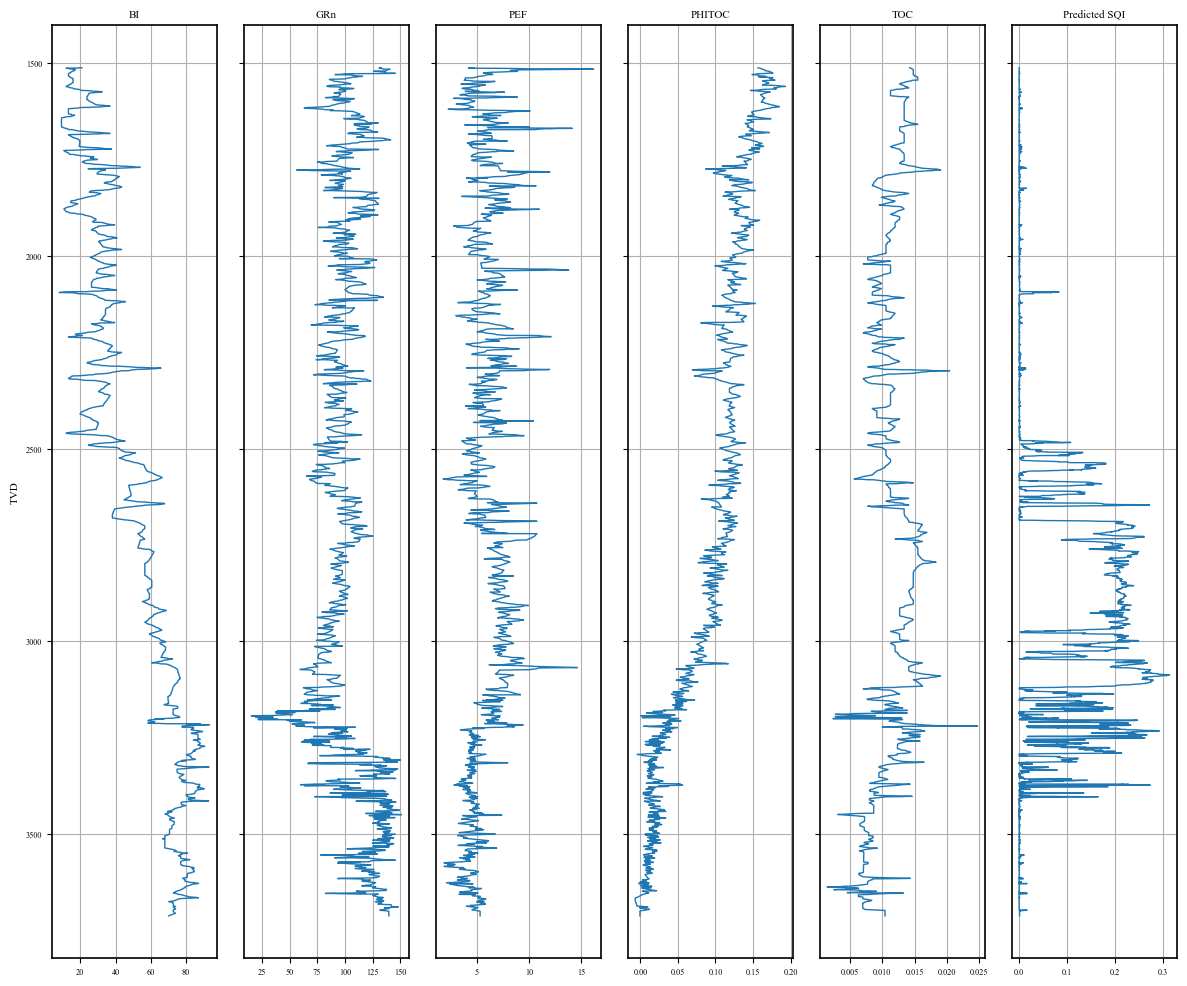

In [48]:

# Kolom yang mau diplot (selain TVD)
cols = ['BI', 'GRn', 'PEF', 
        'PHITOC', 'TOC', 'Predicted SQI']

# Buat figure dengan banyak subplot horizontal
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(2*len(cols), 10), sharey=True)

for ax, col in zip(axes, cols):
    ax.plot(df[col], df["TVD"], lw=1)
    ax.set_title(col, fontsize=8)
    ax.grid(True)
    ax.invert_yaxis()  # kecil di atas, besar di bawah
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)



# Label sumbu Y hanya di plot pertama
axes[0].set_ylabel("TVD", fontsize=8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


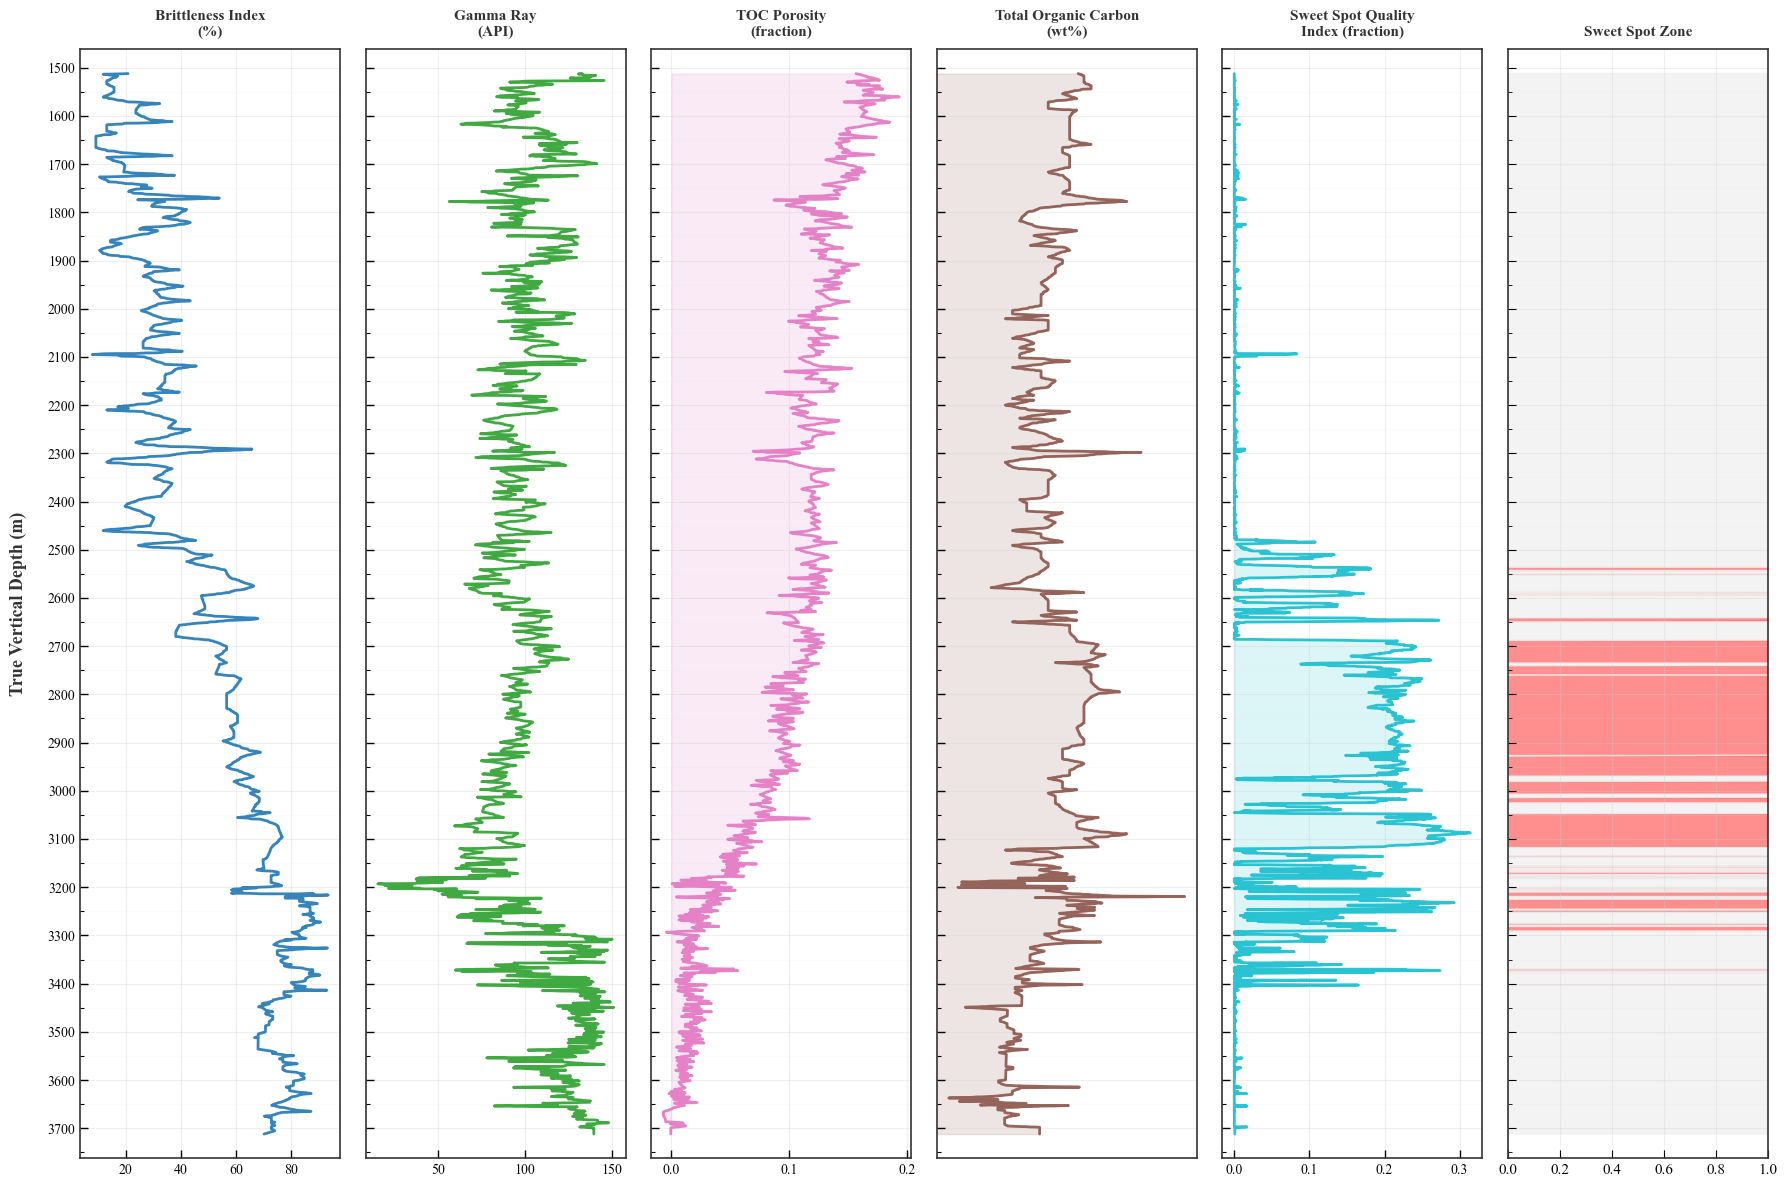

✓ High-quality figures saved in PNG, PDF, and EPS formats
✓ Figure dimensions: 18" × 12" at 300 DPI


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator

# Set style yang lebih profesional
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 11,
    'axes.linewidth': 1.2,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'xtick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.major.size': 6,
    'ytick.minor.size': 3,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.grid': False
})

# Kolom yang mau diplot
cols = ['BI', 'GRn', 'PHITOC', 'TOC', 'Predicted SQI']

# Skema warna profesional yang kontras tinggi
colors = {
    'BI': '#1f77b4',      # Blue
    'GRn': '#2ca02c',     # Green  
    'PEF': '#9467bd',     # Purple
    'PHITOC': '#e377c2',  # Pink
    'TOC': '#8c564b',     # Brown
    'Predicted SQI': '#17becf'  # Cyan
}

# Unit dan label yang proper
labels = {
    'BI': 'Brittleness Index\n(%)',
    'GRn': 'Gamma Ray\n(API)',
    'PHITOC': 'TOC Porosity\n(fraction)',
    'TOC': 'Total Organic Carbon\n(wt%)',
    'Predicted SQI': 'Sweet Spot Quality\nIndex (fraction)'
}

# Create figure dengan aspect ratio yang baik untuk paper
fig_width = 18
fig_height = 12
fig, axes = plt.subplots(
    nrows=1, 
    ncols=len(cols)+1, 
    figsize=(fig_width, fig_height),
    sharey=True,
    facecolor='white'
)

# Remove spacing between subplots
plt.subplots_adjust(wspace=0.08, left=0.06, right=0.96, top=0.92, bottom=0.08)

# Depth range untuk referensi
depth_min = df['TVD'].min()
depth_max = df['TVD'].max()

# Plot setiap track dengan styling yang konsisten
for i, (ax, col) in enumerate(zip(axes[:-1], cols)):
    
    # Background putih bersih
    ax.set_facecolor('white')
    
    # Major grid lines yang subtle
    ax.yaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(MultipleLocator(50))
    ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.3, color='#cccccc')
    ax.grid(True, which='minor', linestyle='-', linewidth=0.4, alpha=0.2, color='#dddddd')
    
    # Plot kurva dengan line yang smooth
    ax.plot(df[col], df['TVD'], 
           color=colors[col], 
           linewidth=2.0, 
           alpha=0.9,
           solid_capstyle='round',
           solid_joinstyle='round')
    
    # Fill area untuk memberikan depth pada kurva (opsional)
    if col in ['PHITOC', 'TOC', 'Predicted SQI']:
        ax.fill_betweenx(df['TVD'], 0, df[col], 
                        color=colors[col], 
                        alpha=0.15)
    
    # Invert Y-axis
    ax.invert_yaxis()
    
    # Set limits dengan margin
    data_range = df[col].max() - df[col].min()
    margin = data_range * 0.05
    ax.set_xlim(df[col].min() - margin, df[col].max() + margin)
    
    # Styling ticks dan labels
    ax.tick_params(
        axis='both', 
        which='major', 
        labelsize=10, 
        colors='black',
        length=6,
        width=1
    )
    ax.tick_params(
        axis='both', 
        which='minor',
        length=3,
        width=0.8
    )
    
    # Header untuk setiap track
    ax.set_xlabel(labels[col], fontsize=11, fontweight='bold', 
                 labelpad=10, color='#333333')
    ax.xaxis.set_label_position('top')
    
    # Border styling
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')
    
    # Format angka pada sumbu x
    if col == 'GRn':
        ax.xaxis.set_major_locator(MultipleLocator(50))
    elif col in ['PHITOC', 'TOC', 'Predicted SQI']:
        ax.xaxis.set_major_locator(MultipleLocator(0.1))

# === SWEET SPOT ZONE TRACK ===
sweet_ax = axes[-1]
sweet_ax.set_facecolor('white')

# Grid untuk konsistensi
sweet_ax.yaxis.set_major_locator(MultipleLocator(100))
sweet_ax.yaxis.set_minor_locator(MultipleLocator(50))
sweet_ax.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.3, color='#cccccc')
sweet_ax.grid(True, which='minor', linestyle='-', linewidth=0.4, alpha=0.2, color='#dddddd')

# Sweet spot identification
sqi_values = df['Predicted SQI'].values
depth_values = df['TVD'].values
threshold = 0.15  # Threshold untuk sweet spot

# Create sweet spot mask
sweet_mask = sqi_values > threshold

# Fill sweet spot zones
sweet_ax.fill_betweenx(depth_values, 0, 1,
                      where=sweet_mask,
                      color='#FF4444',
                      alpha=0.6,
                      interpolate=True,
                      label=f'Sweet Spot (SQI > {threshold})')

# Add pattern untuk zona non-sweet spot
non_sweet_mask = ~sweet_mask
sweet_ax.fill_betweenx(depth_values, 0, 1,
                      where=non_sweet_mask,
                      color='#F0F0F0',
                      alpha=0.8,
                      interpolate=True)


# Styling sweet spot track
sweet_ax.invert_yaxis()
sweet_ax.set_xlim(0, 1)
sweet_ax.set_xlabel('Sweet Spot Zone', fontsize=11, fontweight='bold',
                   labelpad=10, color='#333333')
sweet_ax.xaxis.set_label_position('top')


# Border
for spine in sweet_ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

# === DEPTH AXIS ===
axes[0].set_ylabel('True Vertical Depth (m)', 
                  fontsize=13, fontweight='bold', 
                  color='#333333', labelpad=15)

# Set depth range untuk semua axes
for ax in axes:
    ax.set_ylim(depth_max + 50, depth_min - 50)  # Inverted dengan margin



# === SAVE HIGH QUALITY FIGURES ===
plt.savefig('well_log_professional.png', 
           dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none',
           pad_inches=0.2)

plt.savefig('well_log_professional.pdf', 
           dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none',
           pad_inches=0.2)

plt.savefig('well_log_professional.eps', 
           dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none',
           pad_inches=0.2, format='eps')

plt.tight_layout()
plt.show()

print("✓ High-quality figures saved in PNG, PDF, and EPS formats")
print(f"✓ Figure dimensions: {fig_width}\" × {fig_height}\" at 300 DPI")